In [1]:
import pandas as pd
import librosa
import numpy as np
import os
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')

df

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.4706,audios/1.wav,1.0
1,masculino,20.0,N,0.107,0.107,1.435,0.4706,audios/2.wav,1.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.4706,audios/3.wav,1.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.4706,audios/4.wav,0.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.4706,audios/5.wav,1.0
...,...,...,...,...,...,...,...,...,...
350,femenino,24.0,R3,0.471,0.244,1.525,0.5812,audios/351.wav,1.0
351,femenino,24.0,R2,0.244,0.244,1.525,0.5812,audios/352.wav,0.0
352,femenino,24.0,R1,1.269,0.244,1.525,0.5812,audios/353.wav,1.0
353,femenino,24.0,R4,0.262,0.244,1.525,0.5812,audios/354.wav,1.0


In [3]:
df = df.dropna(how="all")
df.to_csv("dataset.csv", index=False)

df

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.4706,audios/1.wav,1.0
1,masculino,20.0,N,0.107,0.107,1.435,0.4706,audios/2.wav,1.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.4706,audios/3.wav,1.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.4706,audios/4.wav,0.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.4706,audios/5.wav,1.0
...,...,...,...,...,...,...,...,...,...
350,femenino,24.0,R3,0.471,0.244,1.525,0.5812,audios/351.wav,1.0
351,femenino,24.0,R2,0.244,0.244,1.525,0.5812,audios/352.wav,0.0
352,femenino,24.0,R1,1.269,0.244,1.525,0.5812,audios/353.wav,1.0
353,femenino,24.0,R4,0.262,0.244,1.525,0.5812,audios/354.wav,1.0


In [4]:
y_data= df['etiqueta']
x_data= df.drop(columns=['etiqueta'])

x_data

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,audio
0,masculino,20.0,N,0.298,0.107,1.435,0.4706,audios/1.wav
1,masculino,20.0,N,0.107,0.107,1.435,0.4706,audios/2.wav
2,masculino,20.0,R1,0.240,0.107,1.435,0.4706,audios/3.wav
3,masculino,20.0,R1,0.347,0.107,1.435,0.4706,audios/4.wav
4,masculino,20.0,R2,1.435,0.107,1.435,0.4706,audios/5.wav
...,...,...,...,...,...,...,...,...
350,femenino,24.0,R3,0.471,0.244,1.525,0.5812,audios/351.wav
351,femenino,24.0,R2,0.244,0.244,1.525,0.5812,audios/352.wav
352,femenino,24.0,R1,1.269,0.244,1.525,0.5812,audios/353.wav
353,femenino,24.0,R4,0.262,0.244,1.525,0.5812,audios/354.wav


In [5]:
#sumar cuantos datos hay por cada etiqueta

val_counts=y_data.value_counts()
val_counts

etiqueta
1.0    194
0.0    161
Name: count, dtype: int64

In [6]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genero       355 non-null    object 
 1   Edad         355 non-null    float64
 2   pregunta     355 non-null    object 
 3   t_respuesta  355 non-null    float64
 4   min          355 non-null    float64
 5   max          355 non-null    float64
 6   promedio     355 non-null    float64
 7   audio        355 non-null    object 
dtypes: float64(5), object(3)
memory usage: 22.3+ KB


In [7]:
ruta=x_data['audio'].values

def extraer_caracteristicas(ruta):
    y, sr = librosa.load(ruta, sr=None)

    sos = signal.butter(10, [300, 3400], 'bandpass', fs=sr, output='sos')
    y = signal.sosfilt(sos, y)

    centroide = librosa.feature.spectral_centroid(y=y, sr=sr)
    banda = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85).mean()
    zcr = librosa.feature.zero_crossing_rate(y).mean()

    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_std = np.std(rms)

    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=80, fmax=400)
    f0= f0[~np.isnan(f0)]
    pitch_mean = np.mean(f0) if len(f0) > 0 else 0
    pitch_std = np.std(f0) if len(f0) > 0 else 0

    jitter=pitch_std/pitch_mean if pitch_mean !=0 else 0
    shimer=rms_std/rms_mean if rms_mean !=0 else 0

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc1_mean = mfccs[0].mean()
    mfcc2_mean = mfccs[1].mean()  

    return [centroide, banda, rolloff, zcr, rms_mean, rms_std, pitch_mean, pitch_std, jitter, shimer, mfcc1_mean, mfcc2_mean]



In [8]:
caracteristicas = [extraer_caracteristicas(r) for r in ruta]

caracteristicas_df = pd.DataFrame(caracteristicas, columns=['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff',
                                                            'zero_crossing_rate', 'rms_mean', 'rms_std', 'pitch_mean',
                                                            'pitch_std', 'jitter', 'shimmer', 'mfcc1_mean', 'mfcc2_mean'])

caracteristicas_df


,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean
0,"[[1313.8235582247034, 1170.5359714301117, 1269...","[[868.8697861533435, 848.32346606704, 918.6095...",2194.010417,0.031440,0.006061,0.002806,162.104909,17.811544,0.109877,0.462991,-589.587308,265.691903
1,"[[1314.962324312985, 1221.3599639865683, 1241....","[[960.8006464029612, 919.7224200515715, 951.95...",2523.046875,0.033936,0.008412,0.005973,0.000000,0.000000,0.000000,0.710050,-536.279506,209.975030
2,"[[1589.81132913237, 1493.7112378276656, 1473.4...","[[915.1276604313765, 910.4917433712328, 907.89...",2734.375000,0.052176,0.006003,0.002825,0.000000,0.000000,0.000000,0.470632,-562.940682,254.602598
3,"[[1119.111177083738, 1123.6474867046315, 1144....","[[927.0151949357032, 925.423925512738, 904.528...",2217.447917,0.029270,0.008372,0.002220,172.336540,20.592354,0.119489,0.265231,-563.191984,257.590819
4,"[[1483.239111059491, 1525.0696152170747, 1522....","[[901.7750885726025, 976.0885771038382, 1015.2...",2482.336957,0.041504,0.007341,0.005101,0.000000,0.000000,0.000000,0.694851,-541.690904,215.337408
...,...,...,...,...,...,...,...,...,...,...,...,...
350,"[[1242.72579842548, 1061.9621723614084, 1047.1...","[[886.8089806770234, 832.9685646296558, 839.45...",2226.562500,0.026340,0.030104,0.042930,174.073579,12.390005,0.071177,1.426085,-428.988064,154.485837
351,"[[1030.7019186076789, 769.5344372603936, 770.3...","[[796.2597025119654, 639.0721561634969, 689.07...",1602.864583,0.025581,0.025501,0.028435,0.000000,0.000000,0.000000,1.115026,-465.262761,197.441489
352,"[[981.6837831268366, 864.2181980905839, 917.18...","[[776.1785956766213, 736.3611933509146, 766.05...",1777.434593,0.023772,0.021442,0.038520,163.956936,9.698330,0.059152,1.796466,-454.295232,142.571904
353,"[[981.1447058952057, 1143.8596919460867, 1236....","[[768.7174588674939, 926.0408398276984, 979.81...",2034.544428,0.027220,0.014007,0.013703,167.832558,17.543176,0.104528,0.978320,-497.267096,196.590883


In [9]:
x_data=x_data.drop(columns=['audio'])

x_final = pd.concat([x_data.reset_index(drop=True), caracteristicas_df.reset_index(drop=True)], axis=1)

x_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean
0,masculino,20.0,N,0.298,0.107,1.435,0.4706,"[[1313.8235582247034, 1170.5359714301117, 1269...","[[868.8697861533435, 848.32346606704, 918.6095...",2194.010417,0.031440,0.006061,0.002806,162.104909,17.811544,0.109877,0.462991,-589.587308,265.691903
1,masculino,20.0,N,0.107,0.107,1.435,0.4706,"[[1314.962324312985, 1221.3599639865683, 1241....","[[960.8006464029612, 919.7224200515715, 951.95...",2523.046875,0.033936,0.008412,0.005973,0.000000,0.000000,0.000000,0.710050,-536.279506,209.975030
2,masculino,20.0,R1,0.240,0.107,1.435,0.4706,"[[1589.81132913237, 1493.7112378276656, 1473.4...","[[915.1276604313765, 910.4917433712328, 907.89...",2734.375000,0.052176,0.006003,0.002825,0.000000,0.000000,0.000000,0.470632,-562.940682,254.602598
3,masculino,20.0,R1,0.347,0.107,1.435,0.4706,"[[1119.111177083738, 1123.6474867046315, 1144....","[[927.0151949357032, 925.423925512738, 904.528...",2217.447917,0.029270,0.008372,0.002220,172.336540,20.592354,0.119489,0.265231,-563.191984,257.590819
4,masculino,20.0,R2,1.435,0.107,1.435,0.4706,"[[1483.239111059491, 1525.0696152170747, 1522....","[[901.7750885726025, 976.0885771038382, 1015.2...",2482.336957,0.041504,0.007341,0.005101,0.000000,0.000000,0.000000,0.694851,-541.690904,215.337408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,femenino,24.0,R3,0.471,0.244,1.525,0.5812,"[[1242.72579842548, 1061.9621723614084, 1047.1...","[[886.8089806770234, 832.9685646296558, 839.45...",2226.562500,0.026340,0.030104,0.042930,174.073579,12.390005,0.071177,1.426085,-428.988064,154.485837
351,femenino,24.0,R2,0.244,0.244,1.525,0.5812,"[[1030.7019186076789, 769.5344372603936, 770.3...","[[796.2597025119654, 639.0721561634969, 689.07...",1602.864583,0.025581,0.025501,0.028435,0.000000,0.000000,0.000000,1.115026,-465.262761,197.441489
352,femenino,24.0,R1,1.269,0.244,1.525,0.5812,"[[981.6837831268366, 864.2181980905839, 917.18...","[[776.1785956766213, 736.3611933509146, 766.05...",1777.434593,0.023772,0.021442,0.038520,163.956936,9.698330,0.059152,1.796466,-454.295232,142.571904
353,femenino,24.0,R4,0.262,0.244,1.525,0.5812,"[[981.1447058952057, 1143.8596919460867, 1236....","[[768.7174588674939, 926.0408398276984, 979.81...",2034.544428,0.027220,0.014007,0.013703,167.832558,17.543176,0.104528,0.978320,-497.267096,196.590883


In [10]:
df_final = pd.concat([x_final.reset_index(drop=True), y_data.reset_index(drop=True)], axis=1)

df_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.4706,"[[1313.8235582247034, 1170.5359714301117, 1269...","[[868.8697861533435, 848.32346606704, 918.6095...",2194.010417,0.031440,0.006061,0.002806,162.104909,17.811544,0.109877,0.462991,-589.587308,265.691903,1.0
1,masculino,20.0,N,0.107,0.107,1.435,0.4706,"[[1314.962324312985, 1221.3599639865683, 1241....","[[960.8006464029612, 919.7224200515715, 951.95...",2523.046875,0.033936,0.008412,0.005973,0.000000,0.000000,0.000000,0.710050,-536.279506,209.975030,1.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.4706,"[[1589.81132913237, 1493.7112378276656, 1473.4...","[[915.1276604313765, 910.4917433712328, 907.89...",2734.375000,0.052176,0.006003,0.002825,0.000000,0.000000,0.000000,0.470632,-562.940682,254.602598,1.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.4706,"[[1119.111177083738, 1123.6474867046315, 1144....","[[927.0151949357032, 925.423925512738, 904.528...",2217.447917,0.029270,0.008372,0.002220,172.336540,20.592354,0.119489,0.265231,-563.191984,257.590819,0.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.4706,"[[1483.239111059491, 1525.0696152170747, 1522....","[[901.7750885726025, 976.0885771038382, 1015.2...",2482.336957,0.041504,0.007341,0.005101,0.000000,0.000000,0.000000,0.694851,-541.690904,215.337408,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,femenino,24.0,R3,0.471,0.244,1.525,0.5812,"[[1242.72579842548, 1061.9621723614084, 1047.1...","[[886.8089806770234, 832.9685646296558, 839.45...",2226.562500,0.026340,0.030104,0.042930,174.073579,12.390005,0.071177,1.426085,-428.988064,154.485837,1.0
351,femenino,24.0,R2,0.244,0.244,1.525,0.5812,"[[1030.7019186076789, 769.5344372603936, 770.3...","[[796.2597025119654, 639.0721561634969, 689.07...",1602.864583,0.025581,0.025501,0.028435,0.000000,0.000000,0.000000,1.115026,-465.262761,197.441489,0.0
352,femenino,24.0,R1,1.269,0.244,1.525,0.5812,"[[981.6837831268366, 864.2181980905839, 917.18...","[[776.1785956766213, 736.3611933509146, 766.05...",1777.434593,0.023772,0.021442,0.038520,163.956936,9.698330,0.059152,1.796466,-454.295232,142.571904,1.0
353,femenino,24.0,R4,0.262,0.244,1.525,0.5812,"[[981.1447058952057, 1143.8596919460867, 1236....","[[768.7174588674939, 926.0408398276984, 979.81...",2034.544428,0.027220,0.014007,0.013703,167.832558,17.543176,0.104528,0.978320,-497.267096,196.590883,1.0


In [11]:
df_final.dtypes

Genero                 object
Edad                  float64
pregunta               object
t_respuesta           float64
min                   float64
max                   float64
promedio              float64
spectral_centroid      object
spectral_bandwidth     object
spectral_rolloff      float64
zero_crossing_rate    float64
rms_mean              float32
rms_std               float32
pitch_mean            float64
pitch_std             float64
jitter                float64
shimmer               float32
mfcc1_mean            float64
mfcc2_mean            float64
etiqueta              float64
dtype: object

In [12]:
for col in ["spectral_centroid", "spectral_bandwidth"]:
    df_final[col] = df_final[col].apply(lambda x: np.mean(x) if isinstance(x, (list, np.ndarray)) else x)

df_final.dtypes

Genero                 object
Edad                  float64
pregunta               object
t_respuesta           float64
min                   float64
max                   float64
promedio              float64
spectral_centroid     float64
spectral_bandwidth    float64
spectral_rolloff      float64
zero_crossing_rate    float64
rms_mean              float32
rms_std               float32
pitch_mean            float64
pitch_std             float64
jitter                float64
shimmer               float32
mfcc1_mean            float64
mfcc2_mean            float64
etiqueta              float64
dtype: object

C:\Users\sarao\AppData\Local\Temp\ipykernel_5844\4044060939.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x="etiqueta", y="t_respuesta", palette="pastel", ax=axes[1, 0])


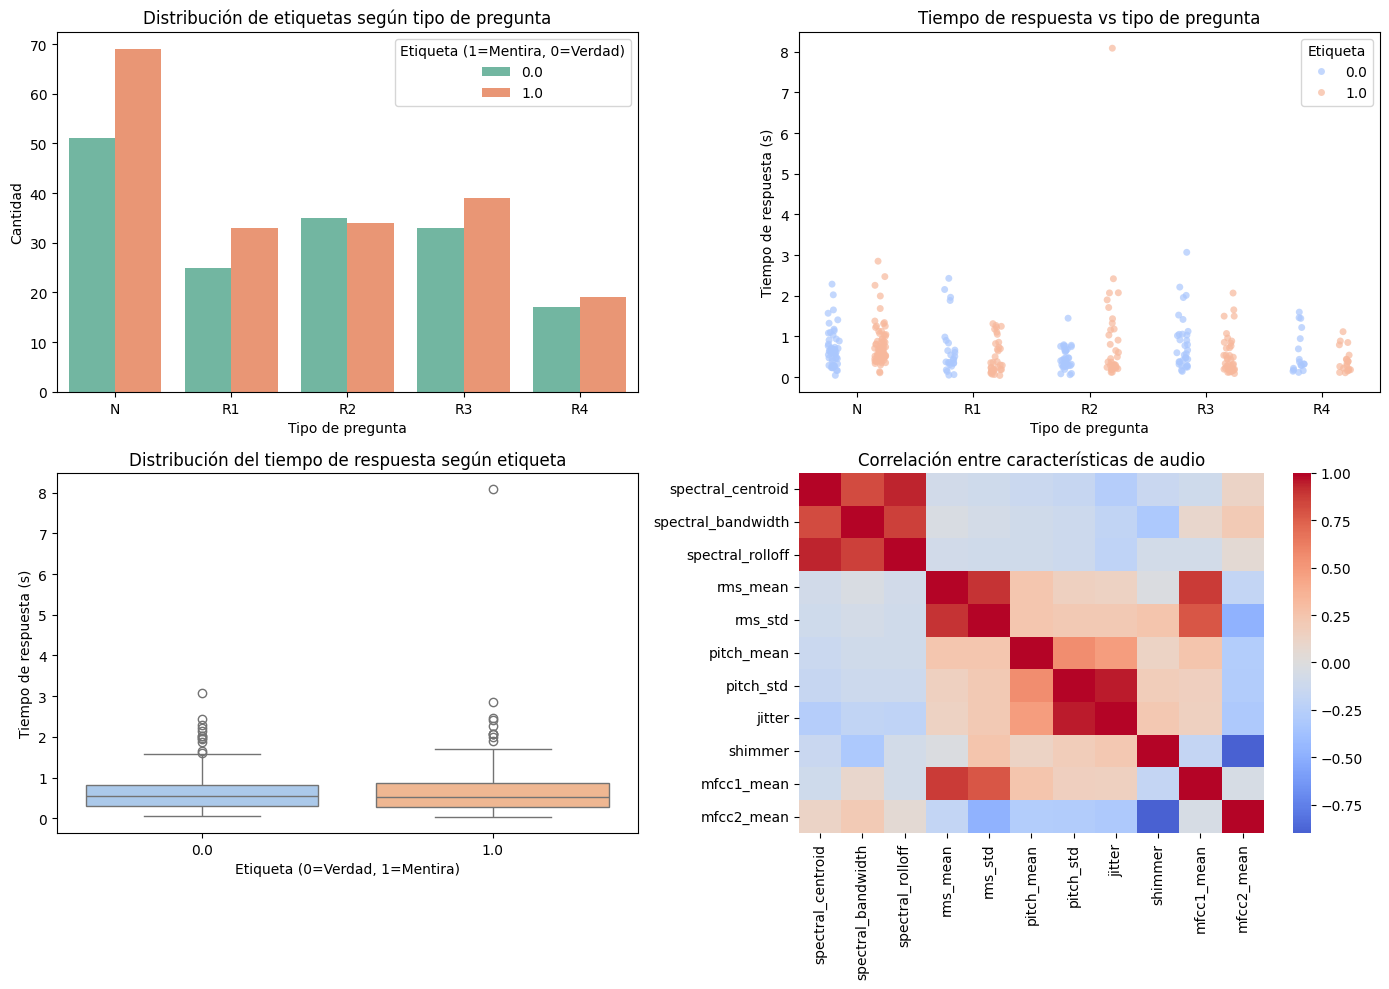

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


sns.countplot(data=df_final, x="pregunta", hue="etiqueta", palette="Set2", ax=axes[0, 0])
axes[0, 0].set_title("Distribución de etiquetas según tipo de pregunta")
axes[0, 0].set_xlabel("Tipo de pregunta")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].legend(title="Etiqueta (1=Mentira, 0=Verdad)")


sns.stripplot(data=df_final, x="pregunta", y="t_respuesta",
              hue="etiqueta", jitter=True, dodge=True, alpha=0.7,
              palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Tiempo de respuesta vs tipo de pregunta")
axes[0, 1].set_xlabel("Tipo de pregunta")
axes[0, 1].set_ylabel("Tiempo de respuesta (s)")
axes[0, 1].legend(title="Etiqueta")


sns.boxplot(data=df_final, x="etiqueta", y="t_respuesta", palette="pastel", ax=axes[1, 0])
axes[1, 0].set_title("Distribución del tiempo de respuesta según etiqueta")
axes[1, 0].set_xlabel("Etiqueta (0=Verdad, 1=Mentira)")
axes[1, 0].set_ylabel("Tiempo de respuesta (s)")


cols_audio = [c for c in df_final.columns if c.startswith(('spectral_','rms', 'pitch', 'jitter', 'shimmer', 'mfcc'))]
corr = df_final[cols_audio].corr()

sns.heatmap(corr, cmap="coolwarm", center=0, ax=axes[1, 1])
axes[1, 1].set_title("Correlación entre características de audio")

plt.tight_layout()
plt.show()

C:\Users\sarao\AppData\Local\Temp\ipykernel_5844\3915418111.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 0].legend(title="Etiquetas: \n1: Mentira \n0: Verdad")


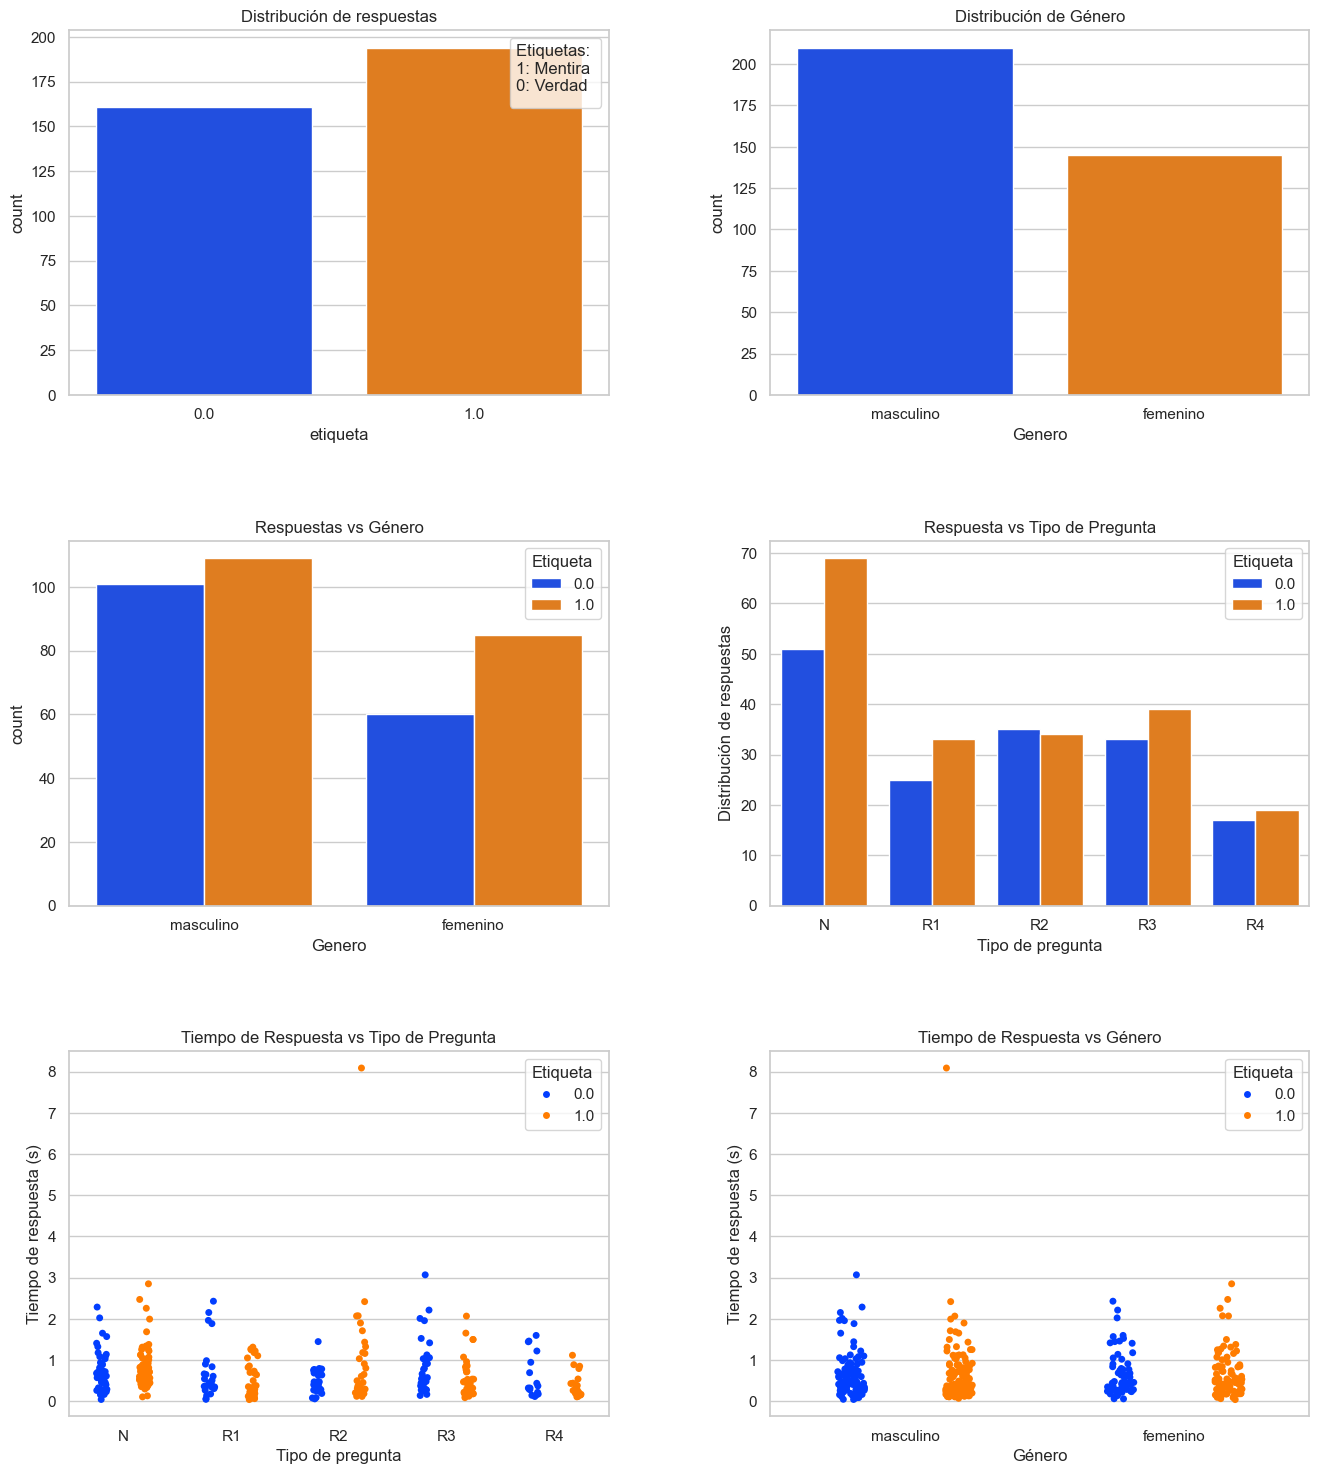

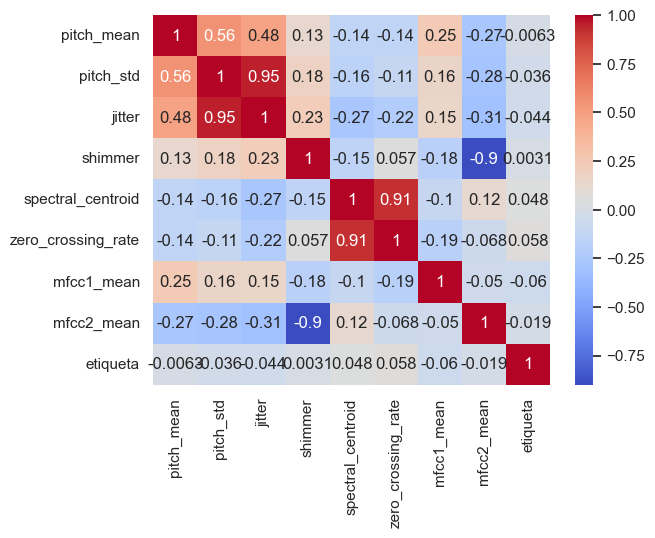

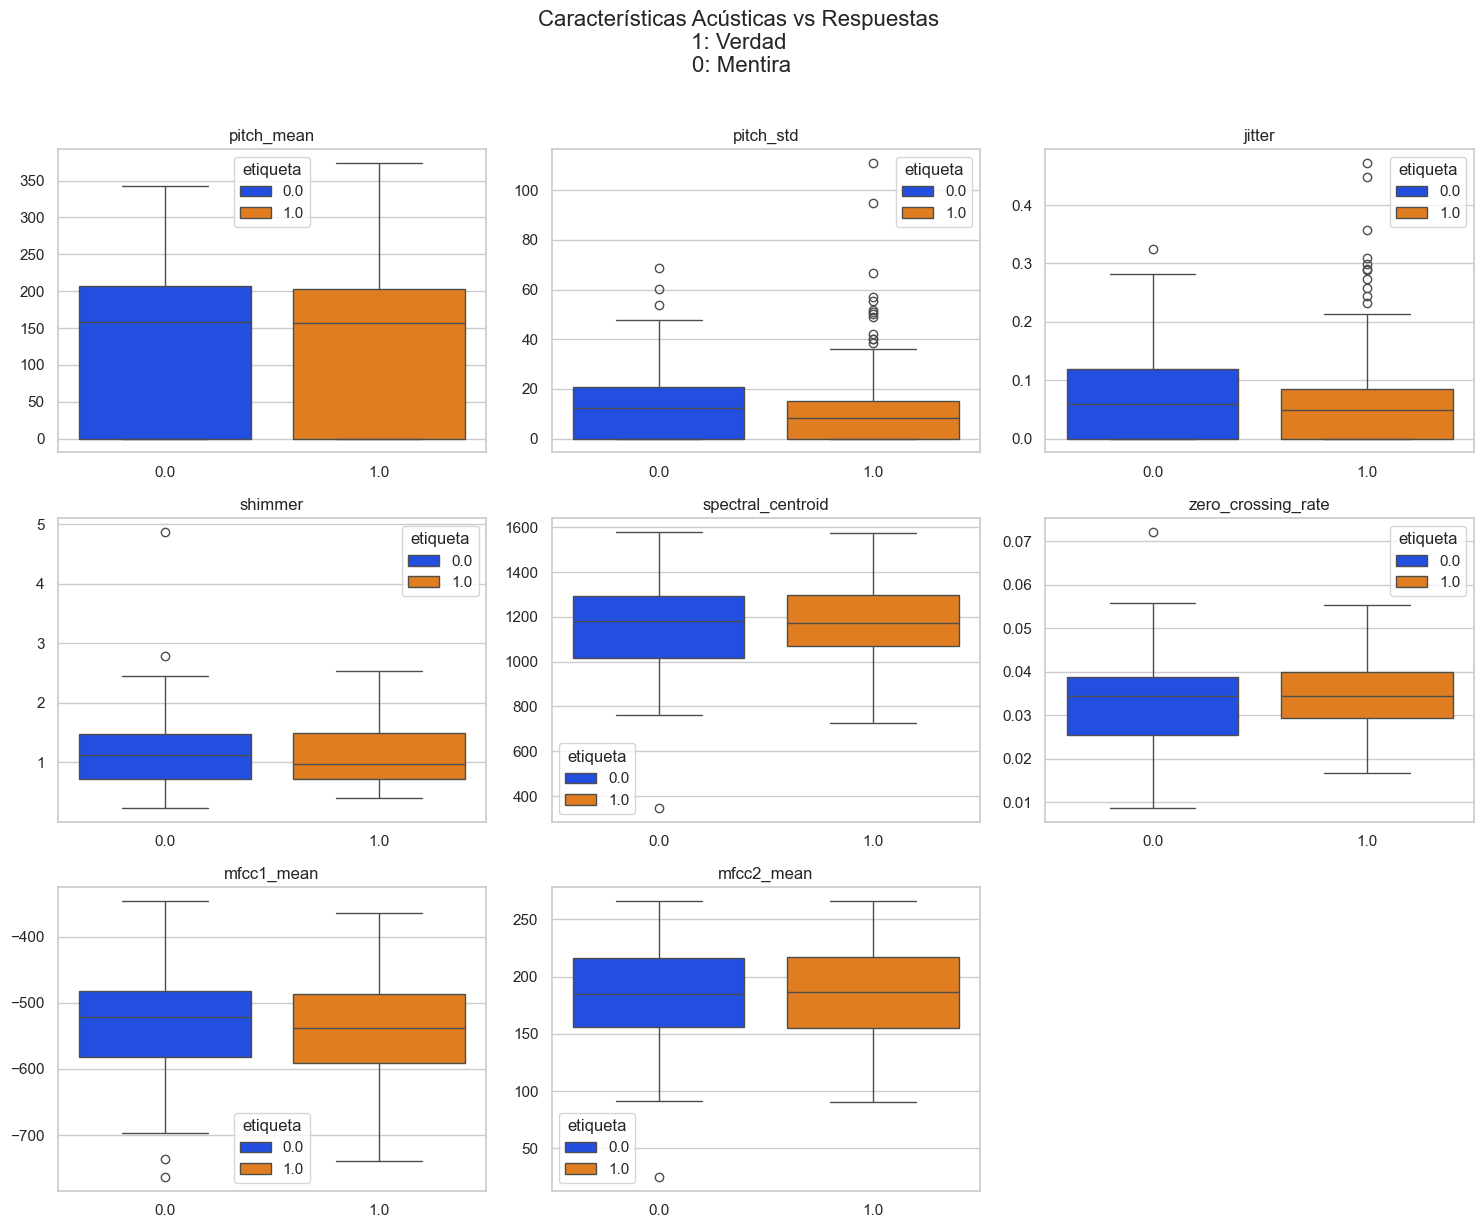

In [14]:
# Configuración general de estilo
sns.set(style="whitegrid", palette="bright")

# Crear los subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Distribución de respuestas 
sns.countplot(data=df_final, x='etiqueta', hue='etiqueta', palette="bright", legend=False, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de respuestas')
axes[0, 0].legend(title="Etiquetas: \n1: Mentira \n0: Verdad")

# Distribución de género 
sns.countplot(data=df_final, x='Genero', hue='Genero', palette="bright", ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Género')
axes[0, 1].legend([], [], frameon=False)

# Respuestas según género 
sns.countplot(data=df_final, x='Genero', hue='etiqueta', palette="bright", ax=axes[1, 0])
axes[1, 0].set_title('Respuestas vs Género')
axes[1, 0].legend(title='Etiqueta')

# Respuestas según tipo de pregunta 
sns.countplot(data=df_final, x='pregunta', hue='etiqueta', palette='bright', ax=axes[1, 1])
axes[1, 1].set_title('Respuesta vs Tipo de Pregunta')
axes[1, 1].set_xlabel('Tipo de pregunta')
axes[1, 1].set_ylabel('Distribución de respuestas')
axes[1, 1].legend(title='Etiqueta')

# Tiempo de respuesta vs tipo de pregunta 
sns.stripplot(data=df_final, x='pregunta', y='t_respuesta', hue='etiqueta', palette='bright', dodge=True, jitter=True, ax=axes[2, 0])
axes[2, 0].set_title('Tiempo de Respuesta vs Tipo de Pregunta')
axes[2, 0].set_xlabel('Tipo de pregunta')
axes[2, 0].set_ylabel('Tiempo de respuesta (s)')
axes[2, 0].legend(title='Etiqueta')

# Tiempo de respuesta vs género 
sns.stripplot(data=df_final, x='Genero', y='t_respuesta', hue='etiqueta', palette='bright', dodge=True, jitter=True, ax=axes[2, 1])
axes[2, 1].set_title('Tiempo de Respuesta vs Género')
axes[2, 1].set_xlabel('Género')
axes[2, 1].set_ylabel('Tiempo de respuesta (s)')
axes[2, 1].legend(title='Etiqueta')

plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------------------

sns.heatmap(df_final[['pitch_mean','pitch_std','jitter','shimmer','spectral_centroid','zero_crossing_rate','mfcc1_mean','mfcc2_mean','etiqueta']].corr(),
            annot=True, cmap='coolwarm')

# Variables acústicas
caracteristicas_acusticas = ['pitch_mean','pitch_std','jitter','shimmer','spectral_centroid','zero_crossing_rate','mfcc1_mean','mfcc2_mean']

# Configuración general de estilo
sns.set(style="whitegrid", palette="bright")
fig, axes = plt.subplots(4, 3, figsize=(15, 16))  # 4 filas, 3 columnas
fig.suptitle('Características Acústicas vs Respuestas \n1: Verdad \n0: Mentira', fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Crear los subplots 
for ax, feature in zip(axes.flat, caracteristicas_acusticas):
    sns.boxplot(data=df_final, x='etiqueta', y=feature, hue='etiqueta', palette='bright', ax=ax)
    ax.set_title(feature,)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Quitar subplots vacíos si sobran
for ax in axes.flat[len(caracteristicas_acusticas):]:
    ax.remove()

plt.tight_layout(rect=[0, 0, 1, 0.97])  # deja espacio para el título principal
plt.show()

In [15]:
df_final = df_final[df_final["t_respuesta"] <= 4]

df_final

,Genero,Edad,pregunta,t_respuesta,min,max,promedio,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,rms_mean,rms_std,pitch_mean,pitch_std,jitter,shimmer,mfcc1_mean,mfcc2_mean,etiqueta
0,masculino,20.0,N,0.298,0.107,1.435,0.4706,1235.322215,930.582290,2194.010417,0.031440,0.006061,0.002806,162.104909,17.811544,0.109877,0.462991,-589.587308,265.691903,1.0
1,masculino,20.0,N,0.107,0.107,1.435,0.4706,1391.224503,1198.878955,2523.046875,0.033936,0.008412,0.005973,0.000000,0.000000,0.000000,0.710050,-536.279506,209.975030,1.0
2,masculino,20.0,R1,0.240,0.107,1.435,0.4706,1575.874530,1039.063161,2734.375000,0.052176,0.006003,0.002825,0.000000,0.000000,0.000000,0.470632,-562.940682,254.602598,1.0
3,masculino,20.0,R1,0.347,0.107,1.435,0.4706,1210.850463,974.920959,2217.447917,0.029270,0.008372,0.002220,172.336540,20.592354,0.119489,0.265231,-563.191984,257.590819,0.0
4,masculino,20.0,R2,1.435,0.107,1.435,0.4706,1382.313523,1051.123066,2482.336957,0.041504,0.007341,0.005101,0.000000,0.000000,0.000000,0.694851,-541.690904,215.337408,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,femenino,24.0,R3,0.471,0.244,1.525,0.5812,1119.046444,1016.145226,2226.562500,0.026340,0.030104,0.042930,174.073579,12.390005,0.071177,1.426085,-428.988064,154.485837,1.0
351,femenino,24.0,R2,0.244,0.244,1.525,0.5812,959.575437,773.246116,1602.864583,0.025581,0.025501,0.028435,0.000000,0.000000,0.000000,1.115026,-465.262761,197.441489,0.0
352,femenino,24.0,R1,1.269,0.244,1.525,0.5812,950.440152,855.989986,1777.434593,0.023772,0.021442,0.038520,163.956936,9.698330,0.059152,1.796466,-454.295232,142.571904,1.0
353,femenino,24.0,R4,0.262,0.244,1.525,0.5812,1027.549991,872.412321,2034.544428,0.027220,0.014007,0.013703,167.832558,17.543176,0.104528,0.978320,-497.267096,196.590883,1.0


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline


cat_drop = ["Genero"]    
cat_full = ["pregunta"]  
num_cols = [c for c in df_final.columns if c not in cat_drop + cat_full + ["etiqueta"]]

preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), num_cols),
    ("cat_drop", OneHotEncoder(drop="first"), cat_drop),
    ("cat_full", OneHotEncoder(drop=None), cat_full)
])

pipeline = Pipeline([
    ("preprocess", preprocessor)
])


X_processed = pipeline.fit_transform(df_final.drop(columns=["etiqueta"]))

if hasattr(X_processed, "toarray"):
    X_arr = X_processed.toarray()
else:
    X_arr = X_processed

x_normalized = pd.DataFrame(X_arr, columns=pipeline.named_steps['preprocess'].get_feature_names_out())

x_normalized


,num__Edad,num__t_respuesta,num__min,num__max,num__promedio,num__spectral_centroid,num__spectral_bandwidth,num__spectral_rolloff,num__zero_crossing_rate,num__rms_mean,...,num__jitter,num__shimmer,num__mfcc1_mean,num__mfcc2_mean,cat_drop__Genero_masculino,cat_full__pregunta_N,cat_full__pregunta_R1,cat_full__pregunta_R2,cat_full__pregunta_R3,cat_full__pregunta_R4
0,0.05,0.084903,0.120000,0.080083,0.094490,0.720228,0.692293,0.576942,0.358732,0.085900,...,0.232479,0.049597,0.416888,0.998607,1.0,1.0,0.0,0.0,0.0,0.0
1,0.05,0.021804,0.120000,0.080083,0.094490,0.846642,0.949875,0.756768,0.398085,0.121806,...,0.000000,0.102888,0.544657,0.767582,1.0,1.0,0.0,0.0,0.0,0.0
2,0.05,0.065742,0.120000,0.080083,0.094490,0.996366,0.796442,0.872264,0.685716,0.085012,...,0.000000,0.051245,0.480755,0.952626,1.0,0.0,1.0,0.0,0.0,0.0
3,0.05,0.101090,0.120000,0.080083,0.094490,0.700385,0.734861,0.589751,0.324512,0.121200,...,0.252817,0.006940,0.480153,0.965016,1.0,0.0,1.0,0.0,0.0,0.0
4,0.05,0.460522,0.120000,0.080083,0.094490,0.839417,0.808020,0.734519,0.517427,0.105448,...,0.000000,0.099610,0.531687,0.789816,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.25,0.142055,0.369091,0.092531,0.197961,0.625946,0.774439,0.594732,0.278315,0.453221,...,0.150597,0.257339,0.801814,0.537501,0.0,0.0,0.0,0.0,1.0,0.0
350,0.25,0.067063,0.369091,0.092531,0.197961,0.496638,0.541241,0.253866,0.266338,0.382904,...,0.000000,0.190242,0.714870,0.715613,0.0,0.0,0.0,1.0,0.0,0.0
351,0.25,0.405682,0.369091,0.092531,0.197961,0.489231,0.620680,0.349273,0.237828,0.320891,...,0.125154,0.337231,0.741158,0.488101,0.0,0.0,1.0,0.0,0.0,0.0
352,0.25,0.073010,0.369091,0.092531,0.197961,0.551756,0.636446,0.489790,0.292194,0.207287,...,0.221162,0.160755,0.638162,0.712086,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
from sklearn.model_selection import train_test_split
from collections import Counter

x_train, x_test, y_train, y_test = train_test_split(x_normalized, df_final["etiqueta"], test_size=0.2, random_state=11, stratify=df_final["etiqueta"])

print("Distribución original de etiquetas en train:", Counter(y_train))
print("Distribución original de etiquetas en test:", Counter(y_test))

Distribución original de etiquetas en train: Counter({1.0: 154, 0.0: 129})
Distribución original de etiquetas en test: Counter({1.0: 39, 0.0: 32})


Modelo 1 - Regresión logística

Clasificación:
              precision    recall  f1-score   support

         0.0       0.42      0.47      0.44        32
         1.0       0.51      0.46      0.49        39

    accuracy                           0.46        71
   macro avg       0.47      0.47      0.46        71
weighted avg       0.47      0.46      0.47        71



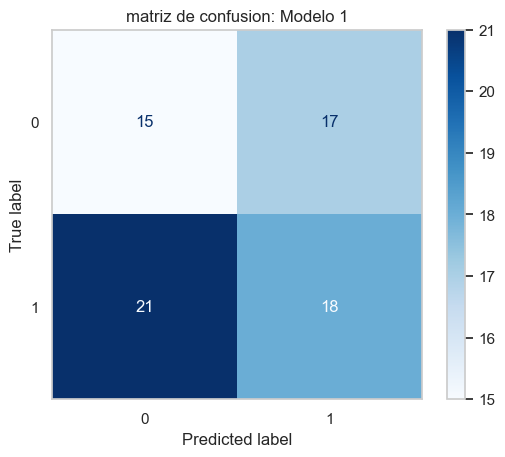

In [ ]:
#REGRSION LOGISTICA

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model_rl = LogisticRegression(class_weight={0: 1, 1: 1}, max_iter=2000)
model_rl.fit(x_train, y_train)

#Prediccion en test
y_pred_rl = model_rl.predict(x_test)

#matrix de confusion
matrix = confusion_matrix(y_test, y_pred_rl)

print("Clasificación:")
print(classification_report(y_test, y_pred_rl))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap="Blues")

plt.title("matriz de confusion: Modelo regresion logistica")
plt.grid()
plt.show()

Modelo 2: Random Forest

Importancia de características:
                       feature  importance
1             num__t_respuesta    0.079979
16             num__mfcc2_mean    0.072877
10                num__rms_std    0.070733
14                num__shimmer    0.068786
8      num__zero_crossing_rate    0.064167
5       num__spectral_centroid    0.063929
7        num__spectral_rolloff    0.062392
6      num__spectral_bandwidth    0.058891
15             num__mfcc1_mean    0.058886
12              num__pitch_std    0.058854
13                 num__jitter    0.056632
9                num__rms_mean    0.054417
11             num__pitch_mean    0.051935
4                num__promedio    0.036647
0                    num__Edad    0.036002
3                     num__max    0.029273
2                     num__min    0.022959
18        cat_full__pregunta_N    0.014152
21       cat_full__pregunta_R3    0.011989
19       cat_full__pregunta_R1    0.008251
17  cat_drop__Genero_masculino    0.006513
20       cat_full__pre

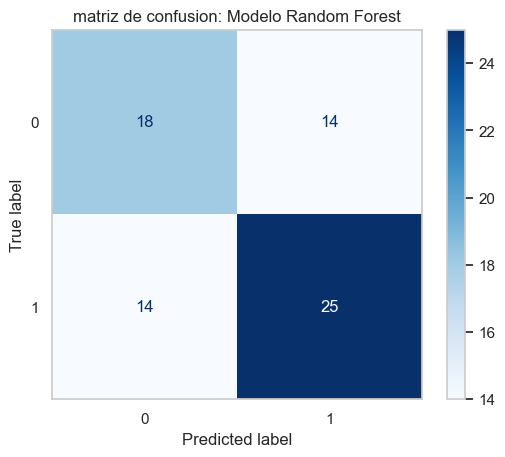

In [27]:
#RANDOM FOREST

#importar librerias
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=450, #numero de arboles, entre mas arboles, mas estabilidad por ende, menos varianza
    max_depth=12, #profundidad max del arbol, si es grande - riesgo de sobreajuste, si es pequeña - modelo muy simple
    min_samples_split=5, #min muestras para dividir nodo 
    class_weight={0: 2, 1: 1},
    random_state=42
)

#entrenamiento del modelo
random_forest.fit(x_train, y_train)

#prediccion en test
y_pred_rf = random_forest.predict(x_test)

#RF calcula que variables fueron más útiles para decidir.
importancias = pd.DataFrame({
    "feature": x_normalized.columns,
    "importance": random_forest.feature_importances_
}).sort_values(by="importance", ascending=False)

print("Importancia de características:")
print(importancias)

#matrix de confusion
matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Clasificación:")
print(classification_report(y_test, y_pred_rf))

disp_rf = ConfusionMatrixDisplay(confusion_matrix=matrix_rf)
disp_rf.plot(cmap="Blues")

plt.title("matriz de confusion: Modelo Random Forest")
plt.grid()
plt.show()

Modelo 3: Keras

C:\Users\sarao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5044 - loss: 0.6917 - val_accuracy: 0.5263 - val_loss: 0.6925
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5221 - loss: 0.6980 - val_accuracy: 0.5614 - val_loss: 0.6939
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4867 - loss: 0.7177 - val_accuracy: 0.5088 - val_loss: 0.6944
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4912 - loss: 0.6981 - val_accuracy: 0.4737 - val_loss: 0.6968
Epoch 5/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6018 - loss: 0.6815 - val_accuracy: 0.4561 - val_loss: 0.7004
Epoch 6/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5752 - loss: 0.6838 - val_accuracy: 0.4737 - val_loss: 0.7026
Epoch 7/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5442 - loss: 0.6750 - val_accuracy: 0.4737 - val_loss: 0.7042
Epoch 8/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5841 - loss: 0.6784 - val_accuracy: 0.4737 - 

C:\Users\sarao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sarao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sarao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

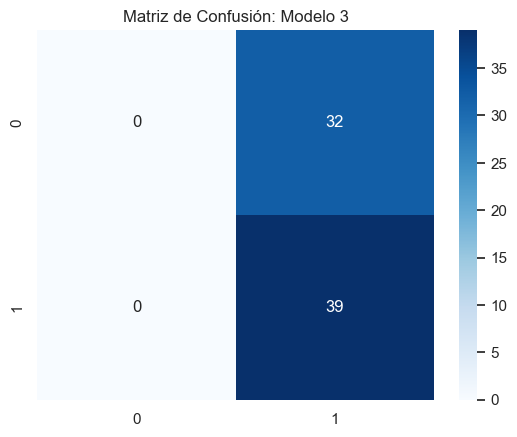

In [ ]:
#importar librerias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Semilla aleatoria
tf.random.set_seed(42)

#Definicion de la arquitectura
model_keras = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)), #capa1,  neuronas, relu
    Dropout(0.3), #apaga el 30% de neuronas 
    Dense(32, activation='relu'), #capa2, extraer patrones mas altos
    Dropout(0.2), #apaga 20%, menos porque la capa es mas pequeña
    Dense(1, activation='sigmoid')  #capa3, 1 neurona porque es binario, sigmoide devuelve probabilidad entre 0 y 1
])

#compilacion del modelo
model_keras.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

#Entrenamiento
history = model_keras.fit(
    x_train, y_train, #datos escalados de entrenamiento
    validation_split=0.2, #saca 20% de validacion, o se 80% train real - 20% validacion
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

#Evaluar
y_prob_keras = model_keras.predict(x_test).ravel()

#convertir probabilidades a clases
y_pred_keras = (y_prob_keras >= 0.5).astype(int)

print(classification_report(y_test, y_pred_keras))

cm_keras = confusion_matrix(y_test, y_pred_keras)
sns.heatmap(cm_keras, annot=True, fmt="g", cmap="Blues")
plt.title("Matriz de Confusión: Modelo Keras")
plt.show()


In [21]:
#guardar el modelo entrenado

model_keras.save("modelo_keras.h5")

XGBoost

XGBoost Tuned Report
              precision    recall  f1-score   support

         0.0       0.57      0.53      0.55        32
         1.0       0.63      0.67      0.65        39

    accuracy                           0.61        71
   macro avg       0.60      0.60      0.60        71
weighted avg       0.60      0.61      0.60        71



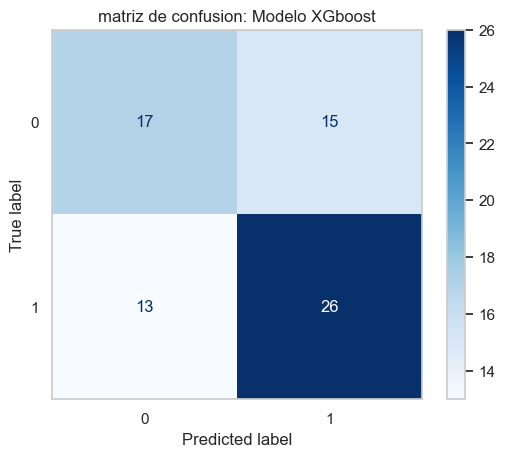

In [28]:
# modelo xgboost
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

class_weight = {0: 1, 1: 1}

weights = np.array([class_weight[y] for y in y_train])

xgb = XGBClassifier(
    n_estimators=500,       # nº de árboles
    learning_rate=0.005,     # velocidad de aprendizaje
    max_depth=7,            # profundidad de árboles 
    eval_metric="logloss",
    random_state=42
)

xgb.fit(x_train, y_train, sample_weight=weights)


y_pred_xgb = xgb.predict(x_test)

print("XGBoost Tuned Report")
print(classification_report(y_test, y_pred_xgb))

matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=matrix_xgb)
disp_xgb.plot(cmap="Blues")

plt.title("matriz de confusion: Modelo XGboost")
plt.grid()
plt.show()


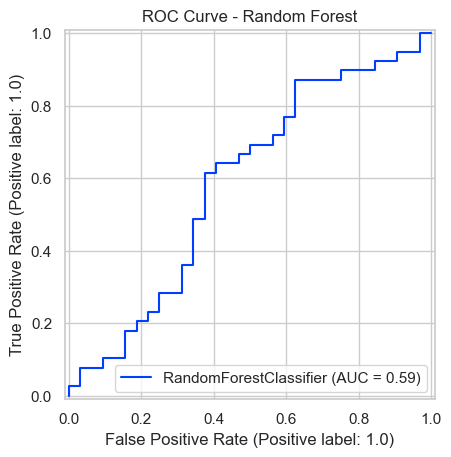

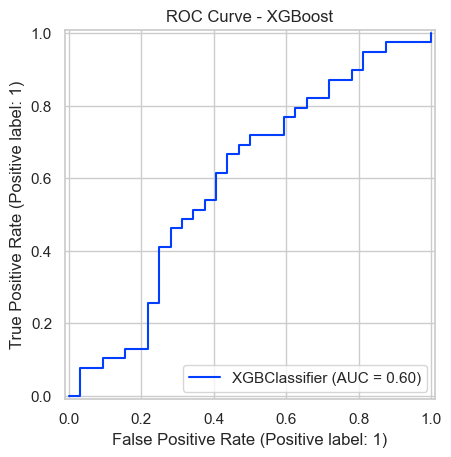

In [26]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(random_forest, x_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

RocCurveDisplay.from_estimator(xgb, x_test, y_test)
plt.title("ROC Curve - XGBoost")
plt.show()
